In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from sse import loss

In [2]:
#生成回归样本数据
from sklearn.datasets import make_regression
rx, ry = make_regression(
    n_samples=100,#样本数
    n_features=1,#特征数
    noise=1,
    bias=1
)

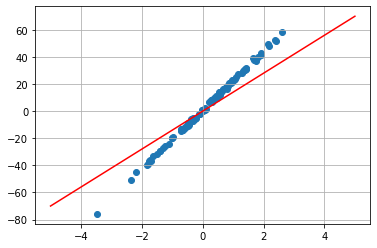

In [3]:
plt.grid()#显示网格线
plt.scatter(rx, ry)#绘制散点图
x = np.linspace(-5,5,100)#生成数字序列，参数start,end,number
w=[0,14]
y = w[0] + x * w[1]
plt.plot(x, y, '-r', label=f'y={w[1]}x+{w[0]}')

In [4]:
loss(rx, ry, w)

array([9028.26228972])

In [5]:
errors=[]
samples = np.linspace(5,25, 9)
for n in samples:
    errors.append(loss(rx, ry, [0, n]))
errors=pd.Series(errors)

In [6]:
errors

0     [40944.07714801761]
1    [29746.643837269305]
2    [20343.002206093828]
3     [12733.15225449122]
4     [6917.093982461472]
5     [2894.827390004591]
6      [666.352477120573]
7     [231.6692438094181]
8    [1590.7776900711276]
dtype: object

In [7]:
errors.shape

(9,)

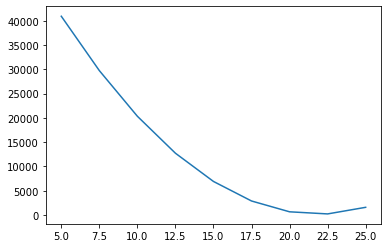

In [8]:
plt.plot(samples, errors)

w0=0.940418,w1=21.733757


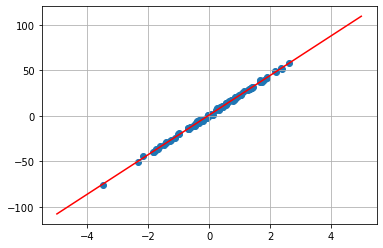

In [9]:
#梯度下降

plt.grid()#显示网格线
plt.scatter(rx, ry)#绘制散点图

x0=np.ones((100,1))
##将x转置成一列
x1=rx.reshape(100,1)
##将x0与x1合成自变量矩阵
rx=np.hstack((x0,x1))
##y_bmi转置成一列
ry=ry.reshape(100,1)

diff_list=[]
w0_3d=[]
w1_3d=[]
# 损失函数的偏导
def gradientFunction(theta, X, Y):
    diff = np.dot(X, theta) - Y
    return (1/100) * np.dot(X.transpose(), diff)

#迭代
def gradientDecent(X, Y, alpha,count):
    theta = np.array([1, 1]).reshape(2, 1)
    w0_3d.append(theta[0])
    w1_3d.append(theta[1])
    #diff_list.append(loss(X,Y,theta))
    gradient = gradientFunction(theta, X, Y)
    while count<100 or not all(abs(gradient) <= 1e-3):##当梯度小于该值时说明此时梯度变化不大，接近最小值，限制最大迭代次数，防止无限制的震荡
        theta = theta - alpha * gradient
        #diff_list.append(loss(X,Y,theta))
        gradient = gradientFunction(theta, X, Y)
        count+=1
        w0_3d.append(theta[0])
        w1_3d.append(theta[1])
    return theta,count

theta,count=gradientDecent(rx,ry,0.05,1)
w0=theta[0]
w1=theta[1]
predict_y=w0+x*w1
print("w0=%f,w1=%f"%(w0,w1))#输出使得损失函数最小的w0，w1
plt.plot(x, predict_y, '-r')


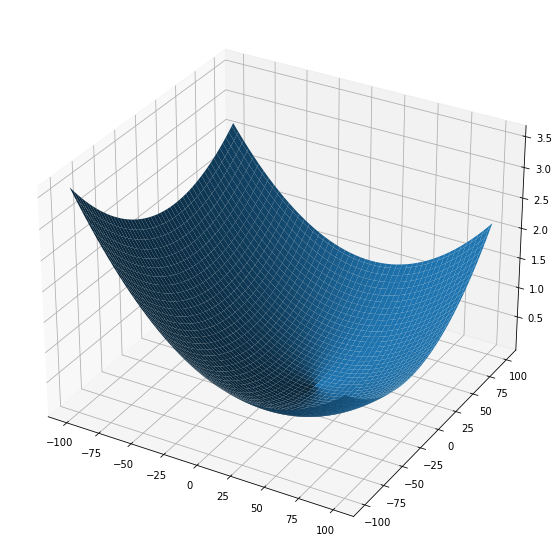

In [10]:
#损失函数图像
x_3d=np.linspace(-100,100,100)
y_3d=np.linspace(-100,100,100)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
diff_3d=np.zeros([100,100])
for i in range(100):
    for j in range(100):
        for k in range(100):
            diff_3d[i][j]+=(ry[k]-(x_3d[i]+y_3d[j]*x1[k]))**2
x_3d,y_3d=np.meshgrid(x_3d,y_3d)
ax.plot_surface(x_3d,y_3d,diff_3d)#在画三维图像时plot_surface要求z轴参数必须为二维
plt.show()